In [1]:
    # !pip install medmnist

In [2]:
# https://github.com/MedMNIST/MedMNIST/blob/main/examples/getting_started.ipynb

In [3]:
%load_ext autoreload
%autoreload 1

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import medmnist
from medmnist import INFO, Evaluator
import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data
import torchvision.transforms as transforms
import torchvision
import torch.nn.functional as F

from tqdm import tqdm

%aimport vq_vae_model

%aimport utils
from utils import plot_real_vs_constructed 
# from basic_vae import VariationalAutoencoder

In [32]:
# data_flag = 'pathmnist'
# data_flag = 'breastmnist'
# data_flag = 'octmnist'
# data_flag = 'chestmnist'
data_flag = 'bloodmnist'
# data_flag = 'organamnist'
# data_flag = 'tissuemnist'
download = True

NUM_EPOCHS = 3
BATCH_SIZE = 64
lr = 0.0001

info = INFO[data_flag]
task = info['task']
n_channels = info['n_channels']
n_classes = len(info['label'])

DataClass = getattr(medmnist, info['python_class'])

# preprocessing
data_transform = transforms.Compose([
                                      transforms.ToTensor(),
                                      #transforms.Normalize((0.5,0.5,0.5), (1.0,1.0,1.0))
                                  ])

# load the data
train_dataset = DataClass(split='train', transform=data_transform, download=download)
test_dataset = DataClass(split='test', transform=data_transform, download=download)

pil_dataset = DataClass(split='train', download=download)

# encapsulate data into dataloader form
train_loader = data.DataLoader(dataset=train_dataset, batch_size=BATCH_SIZE, shuffle=True)
train_loader_at_eval = data.DataLoader(dataset=train_dataset, batch_size=2*BATCH_SIZE, shuffle=False)
test_loader = data.DataLoader(dataset=test_dataset, batch_size=2*BATCH_SIZE, shuffle=False)


Using downloaded and verified file: C:\Users\kella\.medmnist\bloodmnist.npz
Using downloaded and verified file: C:\Users\kella\.medmnist\bloodmnist.npz
Using downloaded and verified file: C:\Users\kella\.medmnist\bloodmnist.npz


In [33]:
train_dataset.imgs.shape

(11959, 28, 28, 3)

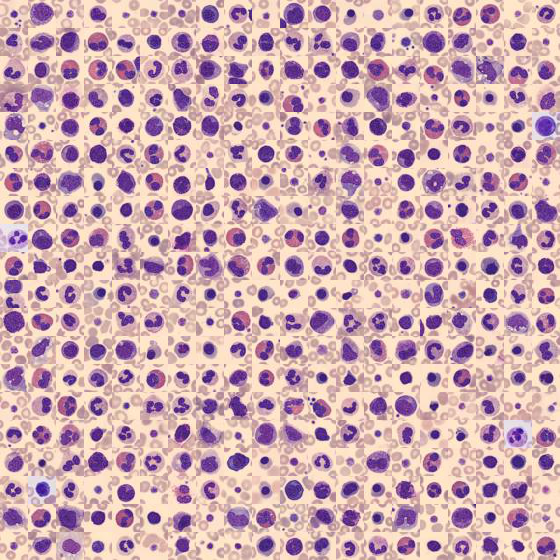

In [34]:
train_dataset.montage()

In [35]:
train_dataset.imgs.max()

255

In [36]:
batch_size = 256
num_training_updates = 15000

num_hiddens = 128
num_residual_hiddens = 32
num_residual_layers = 2

embedding_dim = 64
num_embeddings = 512

commitment_cost = 0.25

decay = 0.99

learning_rate = 1e-3

In [37]:
from vq_vae_model import VariationalAutoencoder


device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
vae = VariationalAutoencoder(num_hiddens, num_residual_layers, num_residual_hiddens,
              num_embeddings, embedding_dim, 
              commitment_cost,decay).to(device) # GPU

vae.train(train_loader, lr=0.001, epochs=10, device=device)
# vae.train(train_loader, lr=0.0001, epochs=10, device=device)
# plot_latent(vae, train_loader)

100%|████████████████████████████████████████████████████████████████████████████████| 187/187 [00:04<00:00, 46.74it/s]


1 iterations
recon_error: 0.467
perplexity: 1.000



100%|████████████████████████████████████████████████████████████████████████████████| 187/187 [00:03<00:00, 49.37it/s]


2 iterations
recon_error: 0.377
perplexity: 1.000



100%|████████████████████████████████████████████████████████████████████████████████| 187/187 [00:03<00:00, 49.63it/s]


3 iterations
recon_error: 4.015
perplexity: 1.007



100%|████████████████████████████████████████████████████████████████████████████████| 187/187 [00:03<00:00, 49.73it/s]


4 iterations
recon_error: 0.263
perplexity: 1.961



100%|████████████████████████████████████████████████████████████████████████████████| 187/187 [00:03<00:00, 49.63it/s]


5 iterations
recon_error: 0.176
perplexity: 6.892



100%|████████████████████████████████████████████████████████████████████████████████| 187/187 [00:03<00:00, 49.29it/s]


6 iterations
recon_error: 0.141
perplexity: 11.825



100%|████████████████████████████████████████████████████████████████████████████████| 187/187 [00:03<00:00, 47.59it/s]


7 iterations
recon_error: 0.119
perplexity: 13.482



100%|████████████████████████████████████████████████████████████████████████████████| 187/187 [00:03<00:00, 47.27it/s]


8 iterations
recon_error: 0.105
perplexity: 14.250



100%|████████████████████████████████████████████████████████████████████████████████| 187/187 [00:03<00:00, 47.57it/s]


9 iterations
recon_error: 0.096
perplexity: 14.872



100%|████████████████████████████████████████████████████████████████████████████████| 187/187 [00:03<00:00, 48.04it/s]

10 iterations
recon_error: 0.089
perplexity: 15.544



In [38]:
vae.train(train_loader, lr=0.0001, epochs=10, device=device)

100%|████████████████████████████████████████████████████████████████████████████████| 187/187 [00:04<00:00, 44.21it/s]


1 iterations
recon_error: 0.084
perplexity: 16.693



100%|████████████████████████████████████████████████████████████████████████████████| 187/187 [00:03<00:00, 47.04it/s]


2 iterations
recon_error: 0.081
perplexity: 17.773



100%|████████████████████████████████████████████████████████████████████████████████| 187/187 [00:04<00:00, 44.72it/s]


3 iterations
recon_error: 0.078
perplexity: 18.615



100%|████████████████████████████████████████████████████████████████████████████████| 187/187 [00:04<00:00, 42.25it/s]


4 iterations
recon_error: 0.076
perplexity: 19.485



100%|████████████████████████████████████████████████████████████████████████████████| 187/187 [00:04<00:00, 42.04it/s]


5 iterations
recon_error: 0.074
perplexity: 20.147



100%|████████████████████████████████████████████████████████████████████████████████| 187/187 [00:04<00:00, 44.85it/s]


6 iterations
recon_error: 0.072
perplexity: 20.565



100%|████████████████████████████████████████████████████████████████████████████████| 187/187 [00:04<00:00, 46.27it/s]


7 iterations
recon_error: 0.070
perplexity: 20.981



100%|████████████████████████████████████████████████████████████████████████████████| 187/187 [00:04<00:00, 46.54it/s]


8 iterations
recon_error: 0.069
perplexity: 21.629



100%|████████████████████████████████████████████████████████████████████████████████| 187/187 [00:04<00:00, 46.42it/s]


9 iterations
recon_error: 0.067
perplexity: 22.318



100%|████████████████████████████████████████████████████████████████████████████████| 187/187 [00:03<00:00, 47.14it/s]

10 iterations
recon_error: 0.066
perplexity: 23.000



In [39]:
def plot_real_vs_constructed(vae, test_dataset, device):
    imgs = np.zeros((4*29, 8*29, 3))
    diff = 0.
    for i in range(8):
        test_img = test_dataset[i][0][None,:,:,:].to(device)
        z = vae._encoder(test_img)
        z = vae._pre_vq_conv(z)
        loss, quantized, perplexity, _ = vae._vq_vae(z)
        img = vae._decoder(quantized)


        imgs[:28, i*28+(i*1):(i+1)*28+(i*1), :] = test_img[0].moveaxis(0, 2).cpu().detach().numpy()
        imgs[28+1:28*2+1, i*28+(i*1):(i+1)*28+(i*1), :] = img[0].moveaxis(0, 2).cpu().detach().numpy()

        diff += ((test_img - img)**2).mean()

    for i in range(8):
        test_img = test_dataset[i+8][0][None,:,:,:].to(device)
        z = vae._encoder(test_img)
        z = vae._pre_vq_conv(z)
        loss, quantized, perplexity, _ = vae._vq_vae(z)
        img = vae._decoder(quantized)

        imgs[2*29+1:3*28+3, i*28+(i*1):(i+1)*28+(i*1), :] = test_img[0].moveaxis(0, 2).cpu().detach().numpy()
        imgs[3*28+4:, i*28+(i*1):(i+1)*28+(i*1), :] = img[0].moveaxis(0, 2).cpu().detach().numpy()

        diff += ((test_img - img)**2).mean()

    print((diff/8).item())        
    plt.figure(figsize=(20,20))
    plt.imshow(imgs, cmap="gray")
    plt.plot()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0.008352244272828102


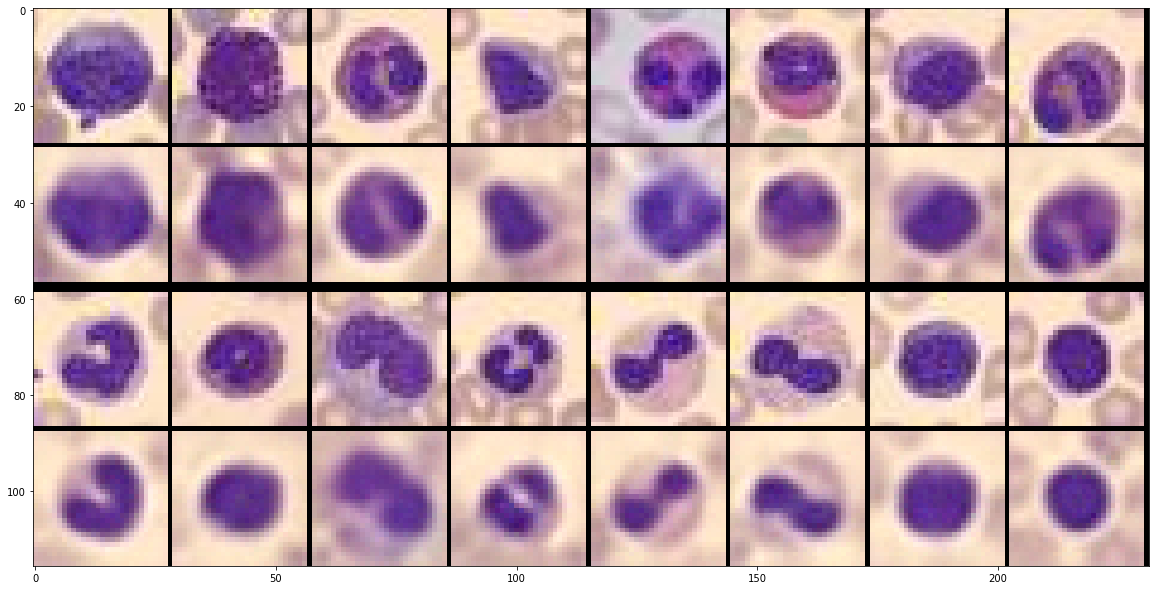

In [40]:
plot_real_vs_constructed(vae, test_dataset, device)

In [44]:
z = torch.randint(-1,1, (embedding_dim,3,3), dtype=torch.float, device=device)
img = vae._decoder.forward(z)
print(img.shape)
# img = F.normalize(img)
plt.imshow(img.moveaxis(1,3).cpu().detach().numpy()[0], cmap="gray")
# plt.imshow(img.moveaxis(1, 3).cpu().detach().numpy()[0])
plt.show()

torch.Size([3, 12, 12])


IndexError: Dimension out of range (expected to be in range of [-3, 2], but got 3)

In [103]:
test_img = test_dataset[5][0][None,:,:,:].to(device)
lat = vae.encoder.forward(test_img)
img = vae.decoder.forward(lat)

[]

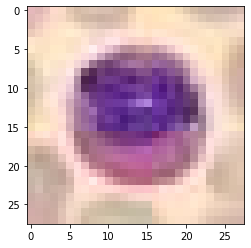

In [104]:
plt.imshow(test_img[0].moveaxis(0, 2).cpu().detach().numpy(), cmap="gray")
plt.plot()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[]

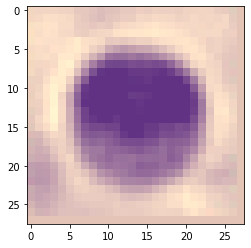

In [105]:
# img = F.normalize(img)
plt.imshow(img[0].moveaxis(0, 2).cpu().detach().numpy(), cmap="gray")
plt.plot()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


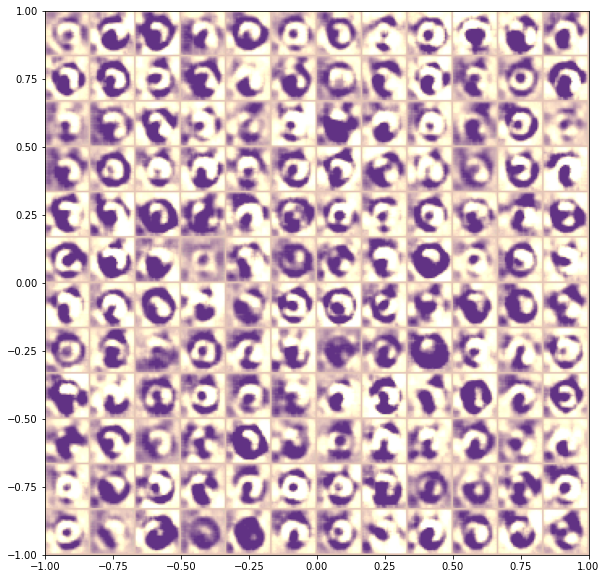

In [106]:
plot_reconstructed(vae, r0=(-1, 1), r1=(-1, 1), latent_dim=latent_dims)

# New Section

In [21]:
i = torch.randn((3, 28, 28))
cov1 = nn.Conv2d(3, 6, 3, stride=2)
cov2 = nn.Conv2d(6, 12, 3, stride=2)
m1 = nn.MaxPool2d(2)
m2 = nn.MaxUnpool2d(3)
lin1 = nn.Linear(75,108)
cov3 = nn.ConvTranspose2d(12,6,3, stride=2)#, output_padding=1)
cov4 = nn.ConvTranspose2d(6,3,3, stride=2, output_padding=1)
cov5 = nn.ConvTranspose2d(3,3,1, stride=1)#, output_padding=1)
print(i.flatten().shape, i.shape)
x = cov1(i)
x = cov2(x)
# x = m1(x)
print(x.flatten().shape, x.shape)
# x = lin1(x.flatten())
# x = x.reshape(3,6,6)
x = cov3(x)
x = cov4(x)
# x = cov4_5(x)
x = cov5(x)
# x = m2(x)
print(x.flatten().shape, x.shape)


torch.Size([2352]) torch.Size([3, 28, 28])
torch.Size([432]) torch.Size([12, 6, 6])
torch.Size([2352]) torch.Size([3, 28, 28])
